In [1]:
#QUANTUM SIMULATION OF THE SCHRÖDINGER EQUATION

In [2]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity 
from qiskit.tools.visualization import plot_histogram

from qiskit import *
IBMQ.load_accounts(hub=None)
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.ibmq import least_busy

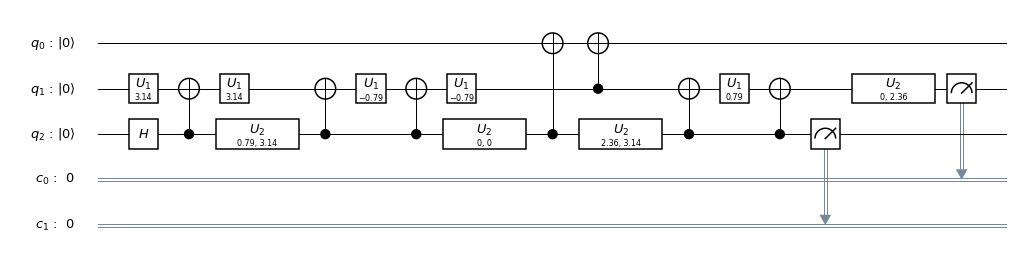

In [3]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')

circ = QuantumCircuit()
circ.add_register(q)
circ.add_register(c)

phi=0

circ.u1(pi,q[1])
circ.h(q[2])
circ.cx(q[2],q[1])
circ.u1(pi,q[1])
circ.u2(pi/4,pi,q[2])
circ.cx(q[2],q[1])
circ.u1(-pi/4,q[1])
circ.cx(q[2],q[1])
circ.u1(-pi/4 + phi , q[1])
circ.u2(2*phi,0,q[2])
circ.cx(q[2],q[0])
circ.cx(q[1],q[0])
circ.u2(3*pi/4,pi,q[2])
circ.cx(q[2],q[1])
circ.u1(pi/4,q[1])
circ.cx(q[2],q[1])
circ.u2(0,3*pi/4,q[1])

circ.measure(q[1],c[0])
circ.measure(q[2],c[1])


circ.draw(output='mpl')

{'01': 379, '00': 123, '11': 387, '10': 135}


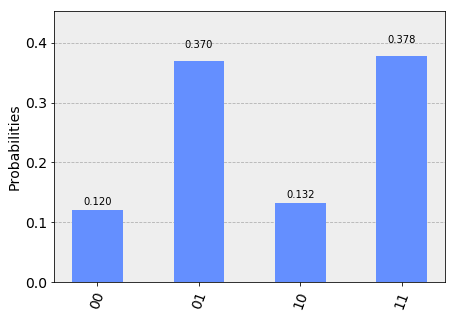

In [4]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(circ, backend_sim).result()
counts = result.get_counts(circ)
print(counts)

plot_histogram(counts)

In [15]:
backend = IBMQ.get_backend('ibmqx4')
job1 = execute(circ, backend)
job_monitor(job1)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

{'11': 255, '01': 216, '00': 284, '10': 269}


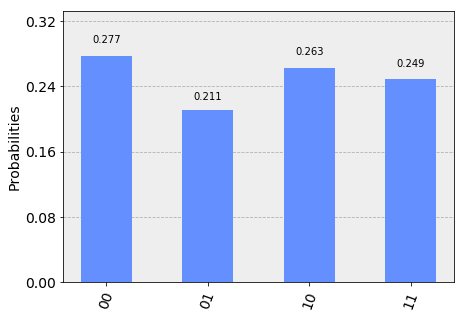

In [16]:
result1 = job1.result()
counts1 = result1.get_counts(circ)
print(counts1)

plot_histogram(counts1)